In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import scipy as sp

import pandas as pd

In [2]:
import scipy.io as sio

In [3]:
spectrel_data = "E:\\毕业论文相关\\高光谱数据\\科研实验数据集 - 副本\\Pavia University scene\\PaviaU.mat"
spectrel_label = "E:\\毕业论文相关\\高光谱数据\\科研实验数据集 - 副本\\Pavia University scene\\PaviaU_gt.mat"

In [4]:
pavia = sio.loadmat(spectrel_data)
pavia_lab = sio.loadmat(spectrel_label)

In [8]:
pavia

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011',
 '__version__': '1.0',
 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
         [ 604,  546,  527, ..., 2442, 2464, 2528],
         [ 621,  746,  556, ..., 2308, 2345, 2361],
         ..., 
         [ 524,  525,  598, ..., 2936, 2940, 2950],
         [ 528,  330,   70, ..., 2737, 2774, 2829],
         [ 711,  483,  423, ..., 2562, 2539, 2488]],
 
        [[ 705,  681,  668, ..., 2607, 2607, 2609],
         [ 891,  692,  453, ..., 1581, 1561, 1522],
         [ 547,  511,  604, ..., 1535, 1531, 1538],
         ..., 
         [1149,  658,  434, ..., 3247, 3251, 3277],
         [ 917, 1004,  743, ..., 2828, 2806, 2808],
         [1037,  849,  547, ..., 2491, 2527, 2522]],
 
        [[1084,  875,  706, ..., 2108, 2167, 2183],
         [ 335,  517,  611, ..., 1105, 1109, 1095],
         [1042,  683,  318, ...,  806,  791,  814],
         ..., 
         [ 799,  693

In [7]:
pavia['paviaU'].shape

(610, 340, 103)

In [11]:
pavia_lab

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:52 2011',
 '__version__': '1.0',
 'paviaU_gt': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)}

In [8]:
pavia_lab['paviaU_gt'].shape
np.unique(pavia_lab['paviaU_gt'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
#Vega10 detailed color code
cmaps = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',
         '#8c564b', '#e377c2','#7f7f7f','#bcbd22','#17becf']

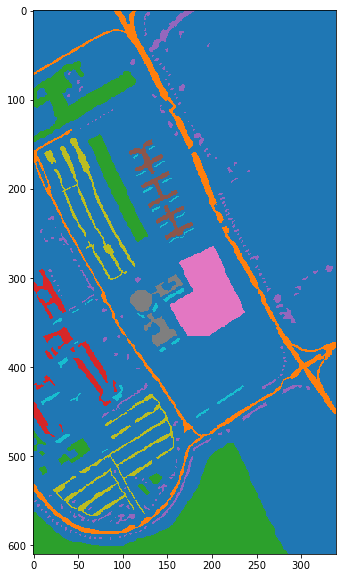

In [35]:
plt.figure(figsize=(8, 10))

plt.imshow(pavia_lab['paviaU_gt'], cmap=plt.get_cmap('Vega10'))

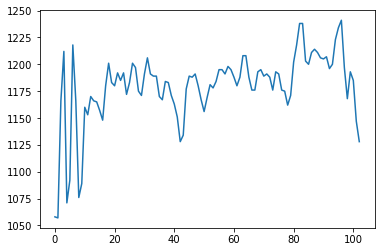

In [7]:
r, c = 50, 250
plt.plot(pavia['paviaU'][r,c], c=cmaps[pavia_lab['paviaU_gt'][r,c]])

In [9]:
test_pav = pavia['paviaU']
test_gt = pavia_lab['paviaU_gt']

In [10]:
trans_pav = test_pav.reshape((610*340,103))
trans_gt = test_gt.reshape((610*340, 1))

In [11]:
exp_dataset = np.concatenate((trans_pav, trans_gt), axis=1)

In [12]:
exp_dataset = exp_dataset.astype('float32')

In [13]:
exp_dataset.shape

(207400, 104)

In [14]:
sum(exp_dataset[:, 103]==1)

6631

# A simple test net using Keras APIs

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


from sklearn import metrics
from sklearn import cross_validation

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.
E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = exp_dataset[:, :-1]
y = exp_dataset[:,-1]
y = y.astype('int')

In [18]:
X_tra_val, X_test, y_tra_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_tra, X_val, y_tra, y_val = train_test_split(X_tra_val, y_tra_val, test_size=0.2, random_state=42)

In [20]:
del(X_tra_val)
del(y_tra_val)

In [21]:
scaler = StandardScaler()
scaler.fit(X_tra)
X_tra_scaled = scaler.transform(X_tra)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Build 3 layer DNN with 10, 20, 10 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(
      X_tra_scaled)
classifier = tf.contrib.learn.DNNClassifier(
      feature_columns=feature_columns, hidden_units=[10, 20, 20, 10], n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000012F9C144C88>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\farmer\\AppData\\Local\\Temp\\tmplygdo19c'}


In [46]:
# Fit and predict.
classifier.fit(X_tra_scaled, y_tra, steps=20000)
predictions = list(classifier.predict(X_val_scaled, as_iterable=True))
score = metrics.accuracy_score(y_val, predictions)
print('Accuracy: {0:f}'.format(score))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\farmer\AppData\Local\Temp\tmplygdo19c\model.ckpt.
INFO:tensorflow:loss = 2.2342, step = 1
INFO:tensorflow:global_step/sec: 2.16867
INFO:tensorflow:loss = 0.794689, step = 101 (46.096 sec)
INFO:tensorflow:global_step/sec: 2.31027
INFO:tensorflow:loss = 0.714341, step = 201 (43.278 sec)
INFO:tensorflow:global_step/sec: 2.11298
INFO:tensorflow:loss = 0.66396, step = 301 (47.476 sec)
INFO:tensorflow:global_step/sec: 2.28337
INFO:tensorflow:loss = 0.603269, step = 401 (43.649 sec)
INFO:tensorflow:global_step/sec: 2.13135
INFO:tensorflow:loss = 0.572369, step = 501 (46.917 sec)
INFO:tensorflow:global_step/sec: 2.13779
INFO:tensorflow:loss = 0.553129, step = 601 (46.866 sec)
INFO:tensorflow:global_step/sec: 1.88949
INFO:tensorflow:loss = 0.540574, step = 701 (52.841 sec)
INFO:tensorflow:global_step/sec: 1.94423
INFO:tensorflow:loss = 0.532243, step = 801 (51.428 sec)
INFO:tensorflow:global_step/

In [47]:
pav_scaled = scaler.transform(X)#scaling
pav_pred = np.array(list(classifier.predict(pav_scaled)))
pav_finall = pav_pred.reshape((610, 340))#transform into 2-d image array

INFO:tensorflow:Restoring parameters from C:\Users\farmer\AppData\Local\Temp\tmplygdo19c\model.ckpt-20000


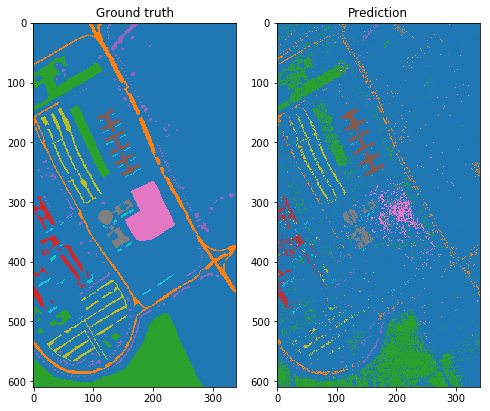

In [48]:
plt.figure(figsize=(8, 10))
gt_ax = plt.subplot(121)
gt_ax.set_title('Ground truth')
gt_ax.imshow(pavia_lab['paviaU_gt'], cmap=plt.get_cmap('Vega10'))

pre_ax = plt.subplot(122)
pre_ax.set_title('Prediction')
pre_ax.imshow(pav_finall, cmap=plt.get_cmap('Vega10'))